In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import ipywidgets as widgets
from IPython.display import display



In [2]:
#dataframe where we are going to store all the information
df = pd.DataFrame(columns=['Nombre', 'Confesión', 'Fecha de Inscripción'])

#read each dataset and concatenate all of them
for i in range(8):
    aux = pd.read_excel('ListadoEntidades{}.xls'.format(i))

    #get just the columns we need - Name, confession, registration date
    aux = aux[['Nombre', 'Confesión', 'Fecha de Inscripción']]

    #merge the datasets
    df = pd.merge(df, aux, on=['Nombre', 'Confesión', 'Fecha de Inscripción'], how='outer')

In [3]:
#change name of columns
df.columns = ['Name', 'Confession', 'Registration_Date']

#change the registration date
df['Registration_Date'] = df['Registration_Date'].map(lambda x: datetime.strptime(str(x), '%Y%m%d'))

#convert Confession from spanish to english
convessions = {'CATÓLICOS': 'catholics',
              'EVANGÉLICOS': 'evangelicals',
              'JUDIOS': 'jews',
              'MUSULMANES': 'muslims',
              'MORMONES': 'mormons',
              'TESTIGOS DE JEHOVÁ': "jehova's witnesses",
              'BUDISTAS': 'buddists',
              'ORTODOXOS': 'orthodox'}
df['Confession'] = df['Confession'].map(lambda x: convessions.get(x.strip()))

In [4]:
#check if there is a missing value
df.isnull().values.any()

False

In [5]:
#new dataset with the values we want to use for create the bar plot

#group by year
grouped = df.groupby([df['Registration_Date'].dt.year, 'Confession']).count()

#create a new df with cleaned data 
d = {}
confessions = {'catholics':0, 'evangelicals':0, 'jews':0, 'muslims':0, 'mormons':0,
       "jehova's witnesses":0, 'buddists':0, 'orthodox':0}
for i in range(1968, 2020):
    d[i] = confessions.copy()

for index, row in grouped.iterrows():
    year, confession= index
    value = row.values[0]
    d[year][confession] = value

In [6]:
#create and add the values stored in d (dictionary)
new_df = pd.DataFrame(columns=['year', 'catholics', 'evangelicals', 'jews', 
                              'muslims', 'mormons', "jehova's witnesses", 
                              'buddists', 'orthodox'])
for year in d.keys():
    new_df = new_df.append({'year':year,'catholics':d[year]['catholics'], 'evangelicals':d[year]['evangelicals'],
                  'jews':d[year]['jews'], 'muslims':d[year]['muslims'], 'mormons':d[year]['mormons'],
                  "jehova's witnesses":d[year]["jehova's witnesses"], 'buddists':d[year]['buddists'], 
                  'orthodox':d[year]['orthodox']}, ignore_index=True)
new_df.set_index('year', inplace=True)

In [7]:
new_df.head()

,catholics,evangelicals,jews,muslims,mormons,jehova's witnesses,buddists,orthodox
year,,,,,,,,
1968,0,72,2,1,1,0,0,1
1969,0,24,3,0,0,0,0,0
1970,0,13,2,1,0,1,0,0
1971,0,24,1,2,0,0,0,0
1972,0,20,1,0,0,0,0,0


<IPython.core.display.Javascript object>


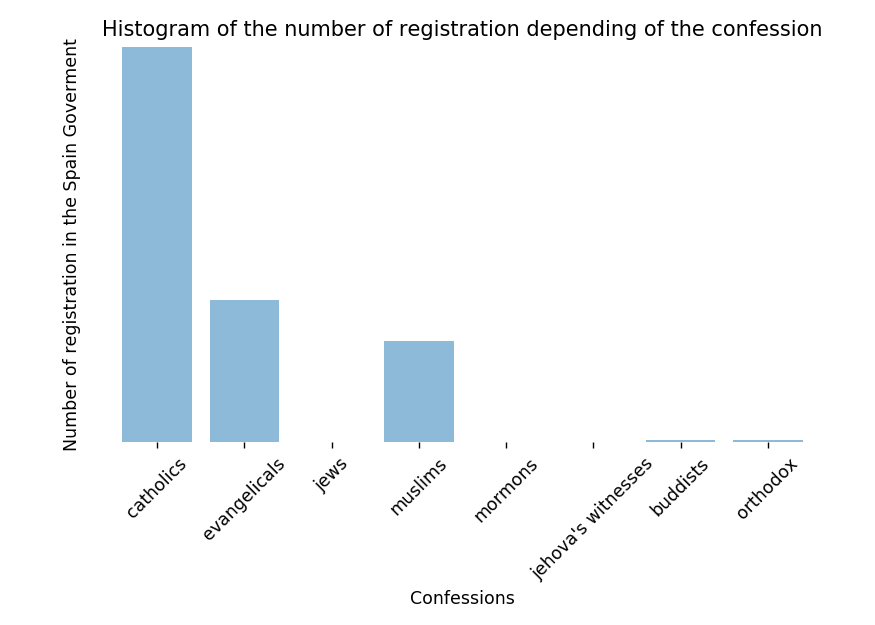

interactive(children=(IntSlider(value=1992, description='year', layout=Layout(width='500px'), max=2019, min=19…

<function __main__.onchange(year)>

In [8]:
#plotting the data
year = 1992
y_pos = np.arange(8)
plt.figure(figsize=(7,5));
# plt.figure()
bar = plt.bar(y_pos, new_df.loc[year].values, align='center', alpha=0.5);
plt.xticks(y_pos, new_df.columns.values.tolist(), rotation=45);
plt.xlabel('Confessions');
plt.ylabel('Number of registration in the Spain Goverment');
plt.title('Histogram of the number of registration depending of the confession');
plt.tight_layout()

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False);

plt.gca().get_yaxis().set_ticks([]);
    
    
values = new_df.loc[year].values.tolist()

plt.ylim([0, max(values)+20]);
clean=[None]*8

for i in range(8):
    clean[i] = plt.text(x = i-0.1, y=values[i]+1, s=values[i]);

def onchange(year):
    global clean
    
    for i in range(8):
        clean[i].set_visible(False)
    
    values = new_df.loc[year].values.tolist()
    for i in range(8):
        bar[i].set_height(values[i]);
    
    for i in range(8):
        clean[i] = plt.text(x = i-0.1, y=values[i]+1, s=values[i]);
    
    plt.ylim([0, max(values)+20]);
    print(year)

year_s = widgets.IntSlider(value=1992, min=1968, max=2019, step=1)
year_s.layout.width = '500px'
widgets.interact(onchange, year=year_s)


<IPython.core.display.Javascript object>


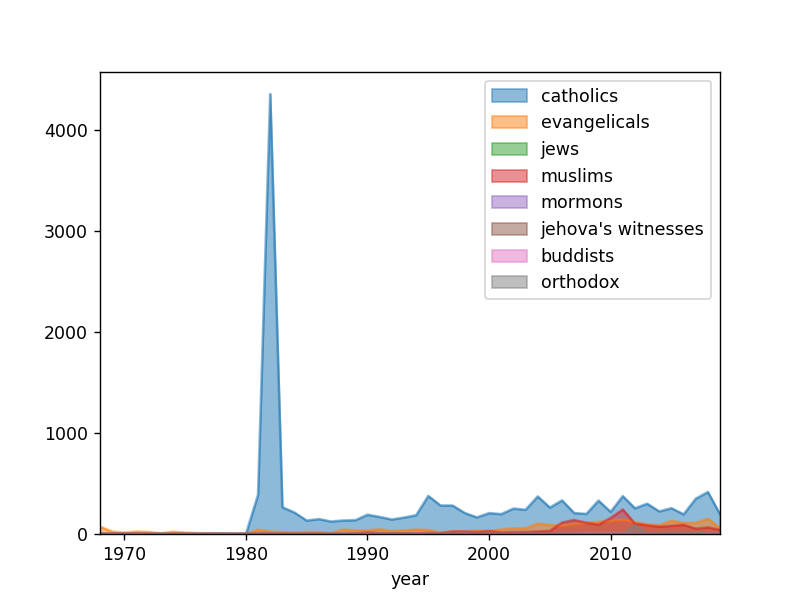

<IPython.core.display.Javascript object>


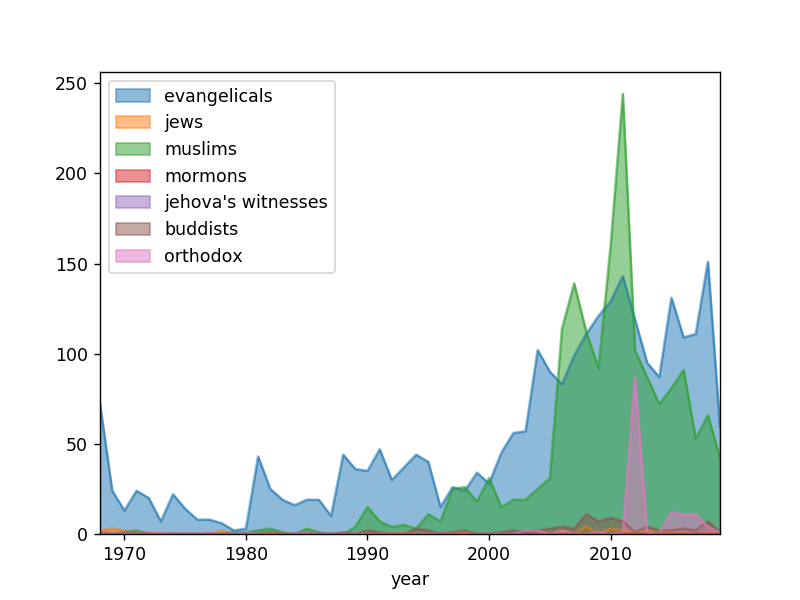

In [9]:
#we can see the it through the time 
new_df.plot.area(stacked=False)

#excluding the catholics
new_df.iloc[:, 1:].plot.area(stacked=False)

<IPython.core.display.Javascript object>


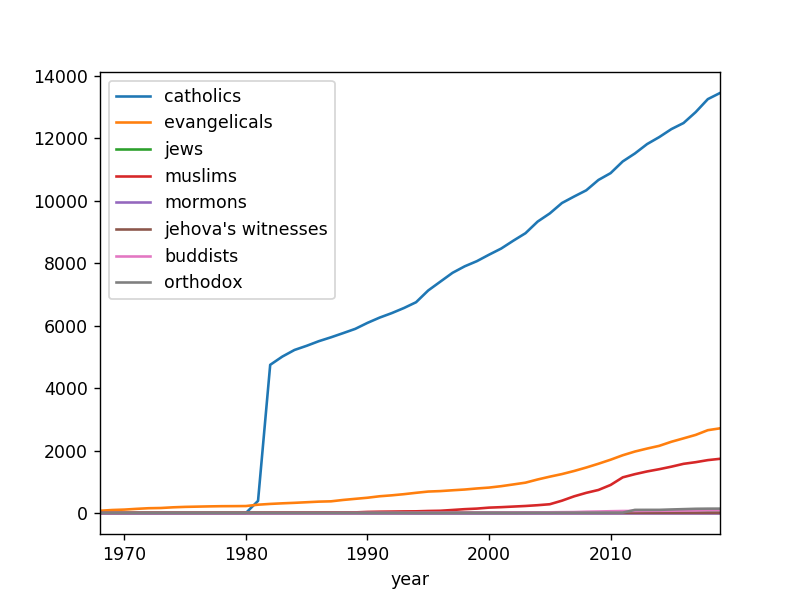

In [11]:
#taking care of the previous registrations
new_df.cumsum().plot()